In [4]:
import binascii
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML
import UPVlog
nombre_cuaderno='1-4b-autonomo_receptor'

mylogger=UPVlog.UPVlog(nombre_cuaderno)

# Receptor digital completo

En este cuaderno debe implementar en una única función *receptor()* todos los pasos vistos en el cuaderno *sincronizacion*

La función receptor debe recibir como entrada:

* x: Las muestras ruidosas de la señal recibida incluyendo silencios iniciales y finales
* D: cantidad de muestras correspondientes a 1 bit
Debe devolver:
* una cadena de texto

Una vez implementada la función debe:

* probarla con la señal *transmitidar.npy* del cuaderno anterior
* Con el parámetro *D=25*
* Comprobar que el resultado coincide con el texto que se obtuvo en sincronizacion

In [5]:
# Funciones copiadas del cuaderno anterior
def boolarray_2_bit_string(array):
    cadena=""
    for e in array:
        if e:
            cadena +="1"
        else:
            cadena +="0"
    return cadena

def decodificar(bits):
    assert len(bits)%8 ==0, "La cantidad de bits debe ser múltiplo de 8"
    tabla={}
    texto=""
    letras="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789.,;:-_=+ */&%#?!"
    for l in letras:
        codigo='{0:08b}'.format(ord(l))
        tabla[codigo]=l
    n1=0
    n2=n1+8
    grupos=[]
    while n2 <= len(bits):
        grupos.append(bits[n1:n2])
        n1+=8
        n2+=8
        
    for elemento in grupos:
        codigo=boolarray_2_bit_string(elemento)
        if codigo in tabla:
            texto += tabla[codigo]
        else:
            texto+="··"
    return texto
        

In [18]:
mylogger.log("Programando receptor()")

def receptor(x,D):
    '''
    x: muestras ruidosas recibidas
    D: cantidad de muestras por bit

    Devuelve:
    Texto decodificado
    '''

    texto = None

    ### BEGIN SOLUTION
    h=np.ones(D)/D
    y = np.convolve(x,h,'valid')
    ly=len(y)
    nbloques = ly//D
    ojos=np.reshape(y[:nbloques*D],(nbloques,D))
    suma = np.sum(np.abs(ojos),axis=0)
    inst_optimo = np.argmax(suma)

    amplitudes=y[inst_optimo::D]
    amplitudes_validas=amplitudes[np.abs(amplitudes)>0.5]
    bits=(amplitudes_validas>0).astype(np.int16)
    
    texto = decodificar(bits)
    
    ### END SOLUTION

    return texto

texto2: INICIO Este es un segundo ejemplo de texto para probar el receptor completo FIN


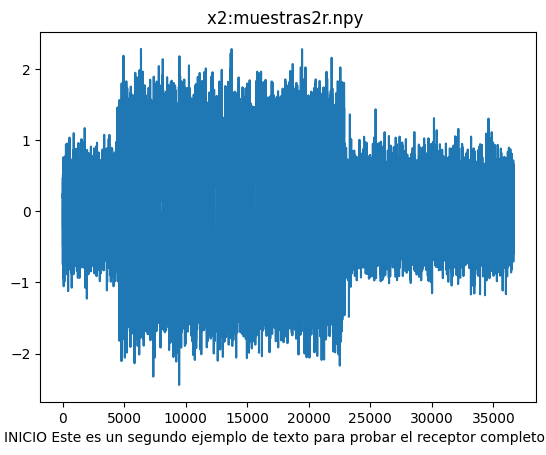

In [22]:
mylogger.log("Testing receptor()")
### BEGIN TESTS
# Comprobación con la misma señal de 1-sincronizacion
x=np.load('transmitidar.npy')
D=25
texto_recibido = receptor(x,D)
assert texto_recibido is not None
assert texto_recibido == 'INICIOEsto es un texto de prueba que convertiremos en bits, luego en una forma de onda, para posteriormente detectar los bits, y recomponer el mensajeFIN'



# Pruebe la función con otras muestras recibidas. Debe leer un texto
x2=np.load("muestras2r.npy")

D2=29
texto2=receptor(x2,D2)
print("texto2:",texto2)

_=plt.plot(x2)
_=plt.title("x2:muestras2r.npy ")
_=plt.xlabel(texto2)
# Debe leer un texto entendible

### END TESTS

# Se ejecutan otros tests ocultos con muestras2r.npy y muestras3r.npy para comprobar si la función es correcta
### BEGIN HIDDEN TESTS
x3=np.load("muestras3r.npy")
### AUTOTEST receptor(x3[10:-20],33)
### END HIDDEN TESTS

mylogger.log("Success Testing receptor()")